# Student Performance Indicator
## LifeCycle of a Machine Learning Project
- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory Data analysis
- Data pre processing
- Model Training
- Model Testing and Model Accuracy
- Choosing the best model



## 1). Problem Statement
- The project understands how the students performance is affected by(test scores) by the other variables such as Gender, ethincity,Parental level of education,Lunch and test preparation course

## 2). Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Data consist of 8 columns and 1000 rows.

## 2.1) Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Import the CSV Data as Pandas DataFrame

In [3]:
df=pd.read_csv('data/stud.csv')

## Show Top 5 Records

In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [24]:
df.shape

(1000, 8)

## 2.1) Data set information
- Gender : sex of the student(Male/Female)
- Race_ethincity: ethnicity of students ('group B', 'group C', 'group A', 'group D', 'group E')
- parental_level_of_education: Education level of student's parents(bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school')
- lunch-having lunch before test ('standard', 'free/reduced)
- test_preparation_course: complete or not complete before test('none', 'completed')
- math_score: numerical data
- reading_score: numerical data
- writing_score: numerical data

## 3.) Data checks to perform
- Check missing values
- Check duplicate values
- Check data type
- Check unique values of each column
- Statistical data of the dataset
- Check various category present in categorical columns

# 3.1) Check missing values

In [14]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values present in the dataset.

## 3.2)Check duplicate values

In [16]:
df.duplicated().sum()

0

There is no duplicate values present in the dataset

## 3.3) Check data types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##  3.4)Check unique values of each column

In [23]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5) Statistical data

In [22]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights:
- From above stastical description of all numerical data, all means are very close to each other between 66.089 and 69.169 
- All Standard deviation is also close between 14.60 to 15.19
- Minimum score of math is 0 but for reading miminum score is much higher 17 and for writing minimum score is 10

## 3.6) Check various category present in categorical columns

In [27]:
print("Categories in Gender are {0}" .format(df['gender'].unique()))
print("Categories in Ethnicity are {0}" .format(df['race_ethnicity'].unique()))
print("Categories in Parental level of education are {0}" .format(df['parental_level_of_education'].unique()))
print("Categories in Lunch are {0}" .format(df['lunch'].unique()))
print("Categories in Test preparation course are {0}" .format(df['test_preparation_course'].unique()))


Categories in Gender are ['female' 'male']
Categories in Ethnicity are ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in Parental level of education are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in Lunch are ['standard' 'free/reduced']
Categories in Test preparation course are ['none' 'completed']


In [31]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print("We have {} numeric feature {}".format(len(numeric_features),numeric_features))
print("We have {} Categorical feature {}".format(len(categorical_features),categorical_features))

We have 3 numeric feature ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical feature ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [32]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## Adding columns for Total_Score and Average

In [37]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3

In [38]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [49]:
math_full=df[df['math_score']==100]['average_score'].count()
reading_full=df[df['reading_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()
print("Total no of student with full marks in maths are {}".format(math_full))
print("Total no of student with full marks in readding are {}".format(reading_full))
print("Total no of student with full marks in writing are {}".format(writing_full))

Total no of student with full marks in maths are 7
Total no of student with full marks in readding are 17
Total no of student with full marks in writing are 14


In [50]:
math_lessthan20=df[df['math_score']<20]['average_score'].count()
reading_lessthan20=df[df['reading_score']<20]['average_score'].count()
writing_lessthan20=df[df['writing_score']<20]['average_score'].count()
print("Total no of student with marks less than 20 in maths are {}".format(math_lessthan20))
print("Total no of student with marks less than 20 in readding are {}".format(reading_lessthan20))
print("Total no of student with marks less than 20 in writing are {}".format(writing_lessthan20))

Total no of student with marks less than 20 in maths are 4
Total no of student with marks less than 20 in readding are 1
Total no of student with marks less than 20 in writing are 3


## Insights
- From above values we get students have performed worst in math
- Best performance in reading section

## 4.) Exploring Data(Visualization)

### 4.1) Visualizing Average score distribution to make some conclusion.
- Histogram
- Kernel Distribution function(KDE)

### 4.1.1) Histogram & KDE


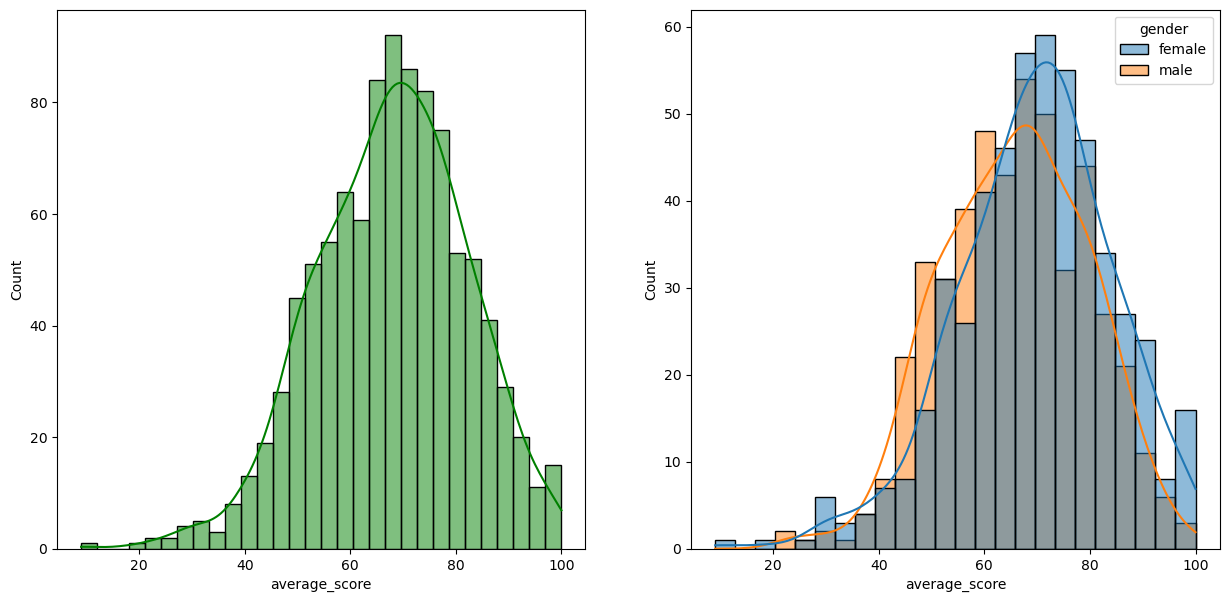

In [54]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

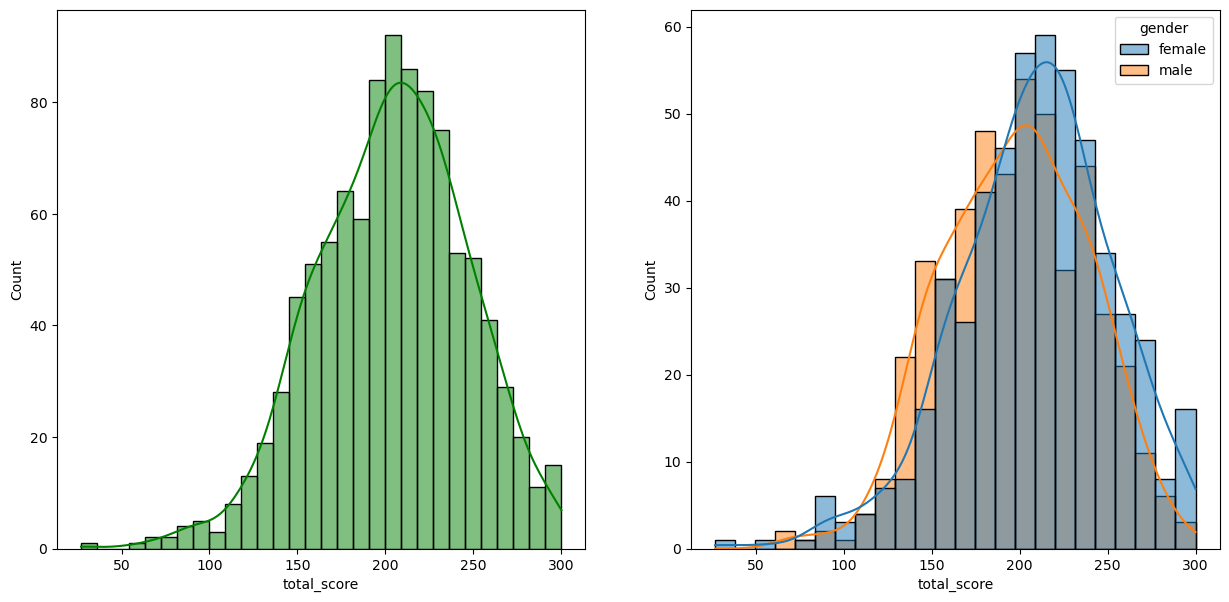

In [55]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

### Insights:
- Female students tends to perfom well than male students

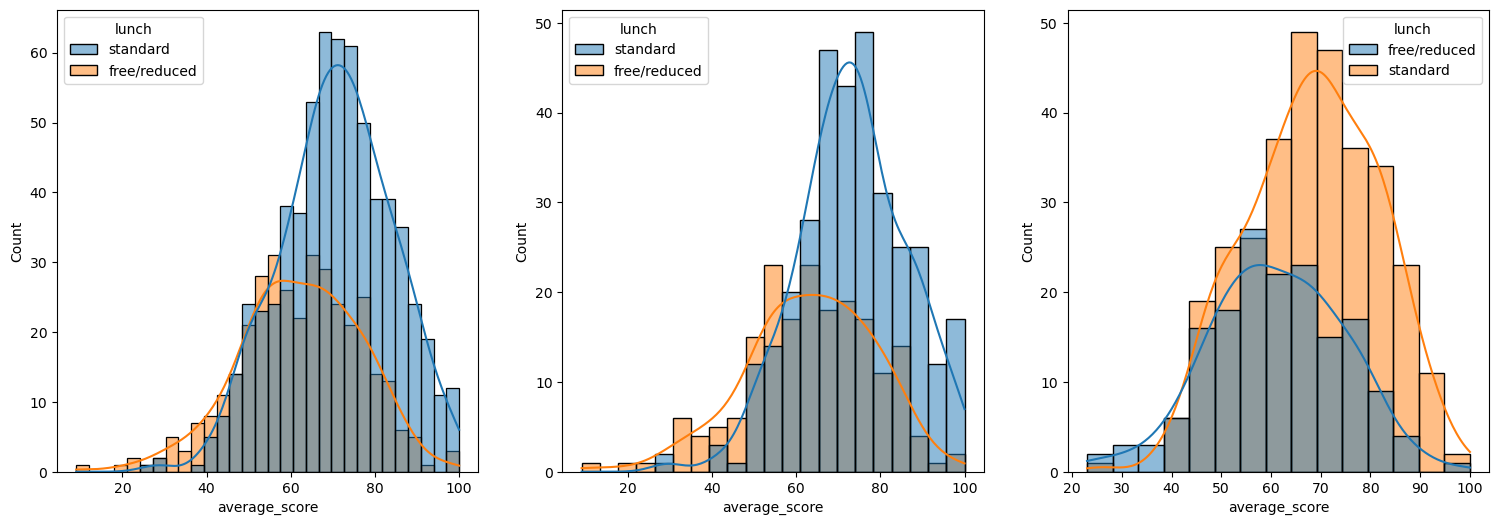

In [58]:
fig,axs=plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

### Insights: 
- Standard lunch helps perform well in exam for both male and female

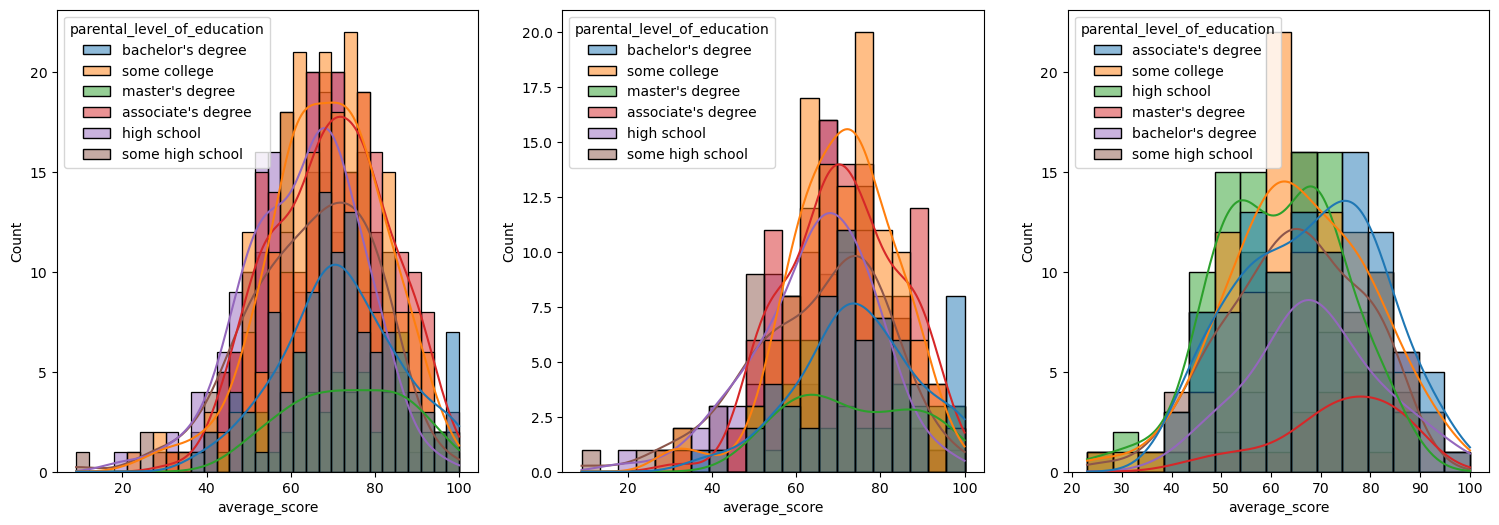

In [59]:
fig,axs=plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

### Insights:
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

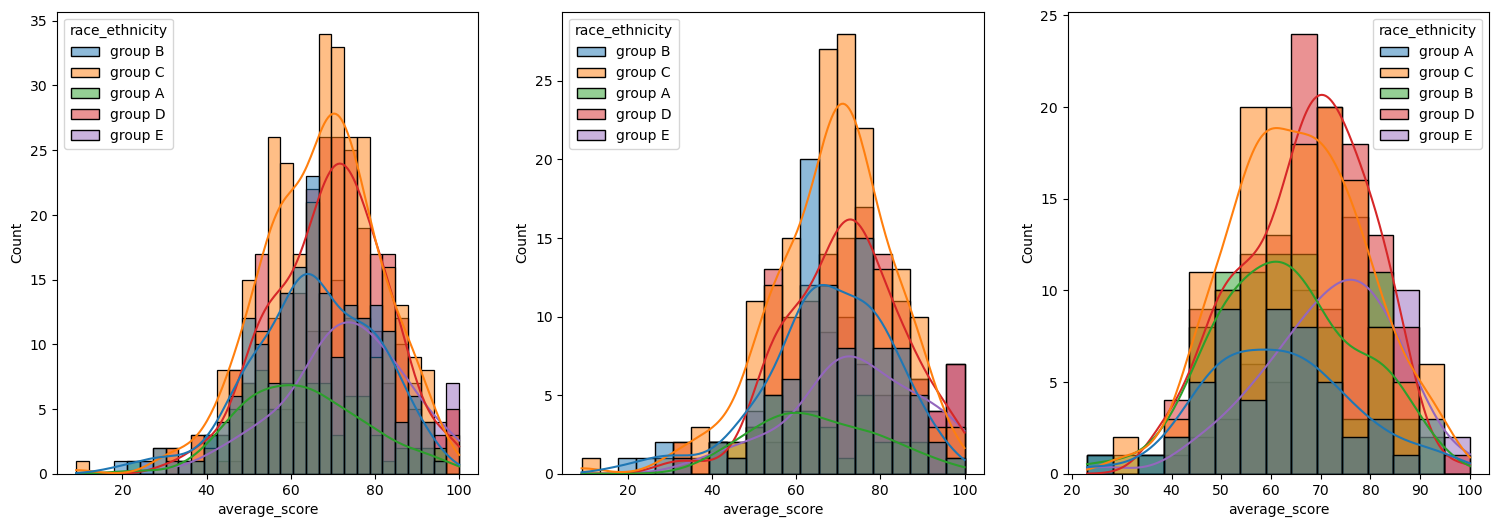

In [60]:
fig,axs=plt.subplots(1,2,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female